## **의사결정나무의 depth가 1인 경우**

In [1]:
# @title
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 수집
data = {
    'study_hours': [5, 3, 1, 4, 2],
    'rest_hours': [2, 1, 2, 1, 3],
    'result': ['pass', 'pass', 'fail', 'pass', 'fail']
}

df = pd.DataFrame(data)
df

,study_hours,rest_hours,result
0,5,2,pass
1,3,1,pass
2,1,2,fail
3,4,1,pass
4,2,3,fail


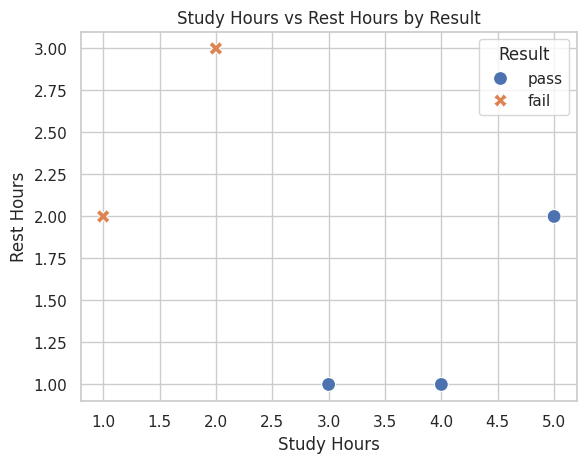

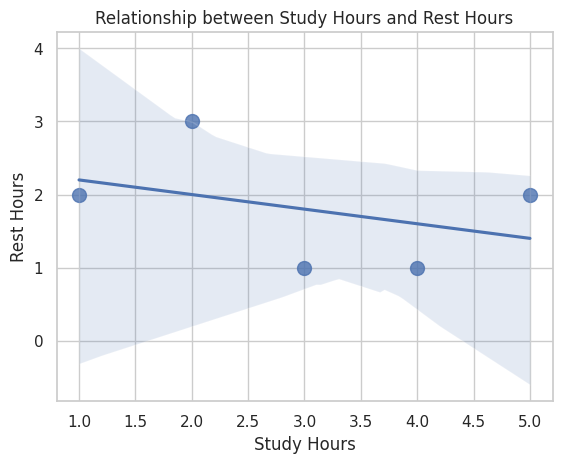

In [2]:
# @title
import seaborn as sns
# 시각화 스타일 설정
sns.set(style="whitegrid")

# 1. 공부 시간과 휴식 시간에 따른 결과 분포
sns.scatterplot(data=df, x='study_hours', y='rest_hours', hue='result', style='result', s=100)
plt.title('Study Hours vs Rest Hours by Result')
plt.xlabel('Study Hours')
plt.ylabel('Rest Hours')
plt.legend(title='Result')
plt.show()

# 2. 공부 시간과 휴식 시간의 관계
sns.regplot(data=df, x='study_hours', y='rest_hours', scatter_kws={'s': 100})
plt.title('Relationship between Study Hours and Rest Hours')
plt.xlabel('Study Hours')
plt.ylabel('Rest Hours')
plt.show()


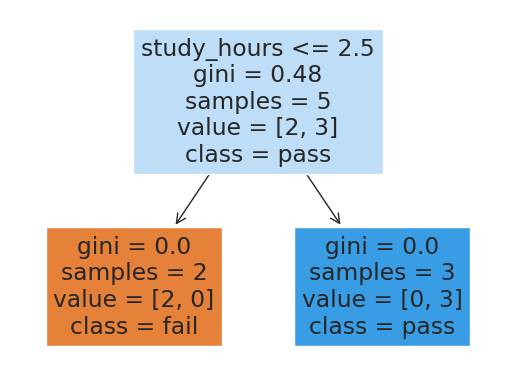

In [3]:
# @title
# 데이터 전처리
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

# 특징과 라벨 분리
X = df[['study_hours', 'rest_hours']]
y = df['result']

# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X, y)

# 결정 트리 시각화
plot_tree(model, feature_names=['study_hours', 'rest_hours'], class_names=label_encoder.classes_, filled=True)
plt.show()

## **의사결정나무의 depth가 3인 경우**

,study_hours,rest_hours,result
0,6,17,fail
1,1,19,fail
2,4,19,pass
3,4,12,fail
4,8,17,pass
5,4,18,fail
6,6,18,pass
7,3,19,fail
8,5,12,fail
9,8,16,pass


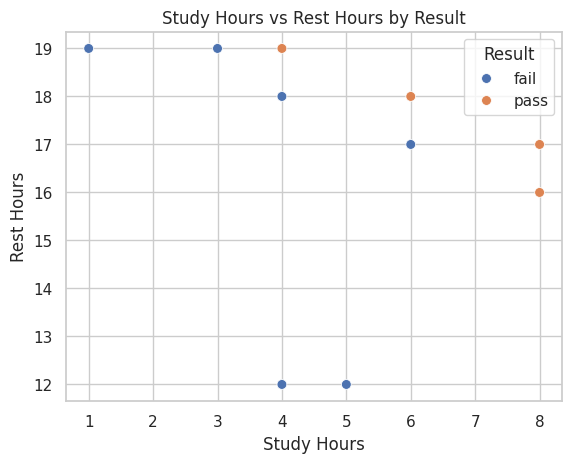

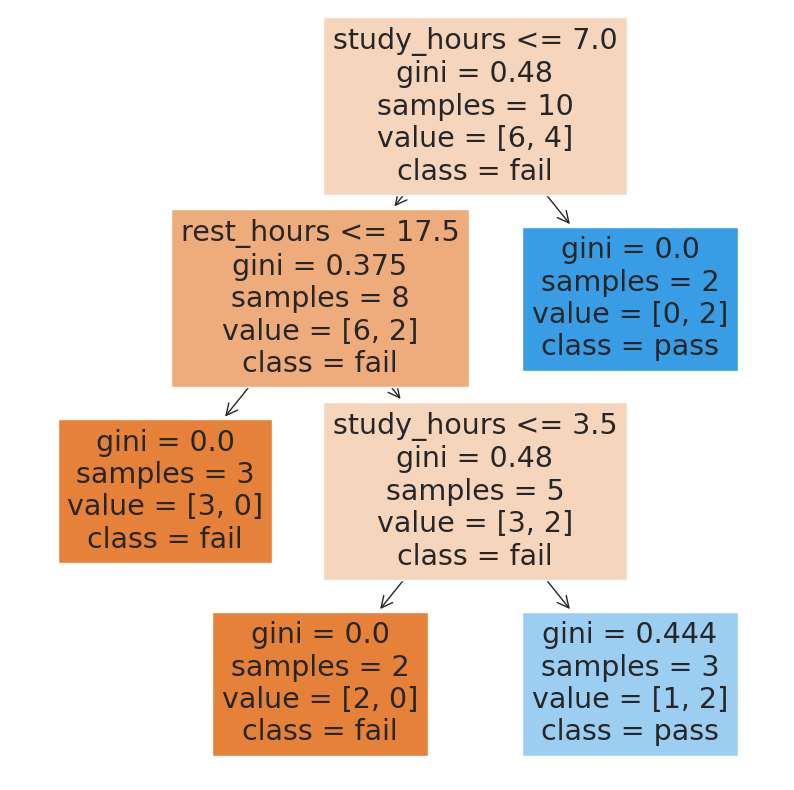

In [21]:
# @title
import numpy as np
# 데이터 수집
np.random.seed(0)
data = {
    'study_hours': np.random.randint(1, 10, 10),
    'rest_hours': np.random.randint(11, 20, 10),
    'result': np.random.choice(['pass', 'fail'], 10)
}

df = pd.DataFrame(data)
display(df)

# prompt: study_hours	rest_hours의 산점도를 result를 hue로하여 시각화

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='study_hours', y='rest_hours', hue='result', s=50)
plt.title('Study Hours vs Rest Hours by Result')
plt.xlabel('Study Hours')
plt.ylabel('Rest Hours')
plt.legend(title='Result')
plt.show()

# 데이터 전처리
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

X = df[['study_hours', 'rest_hours']]
y = df['result']

# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# 결정 트리 시각화
plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=['study_hours', 'rest_hours'], class_names=label_encoder.classes_, filled=True)
plt.show()

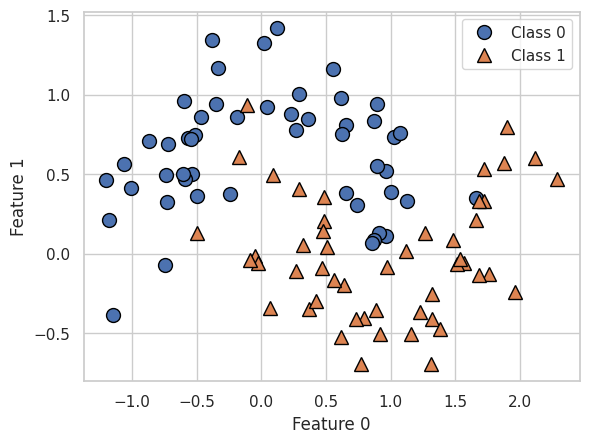

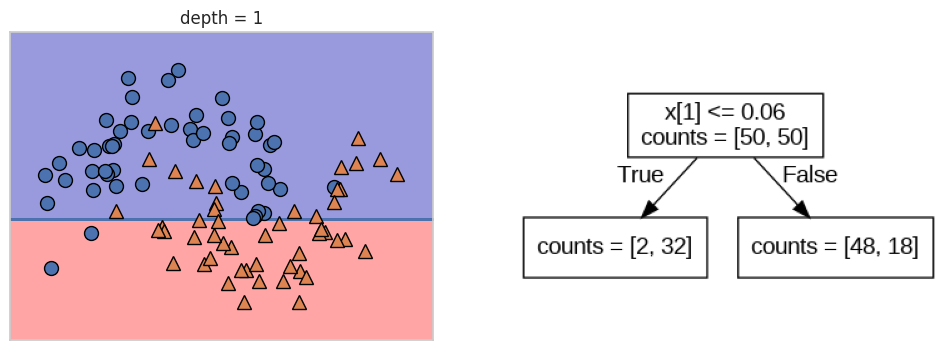

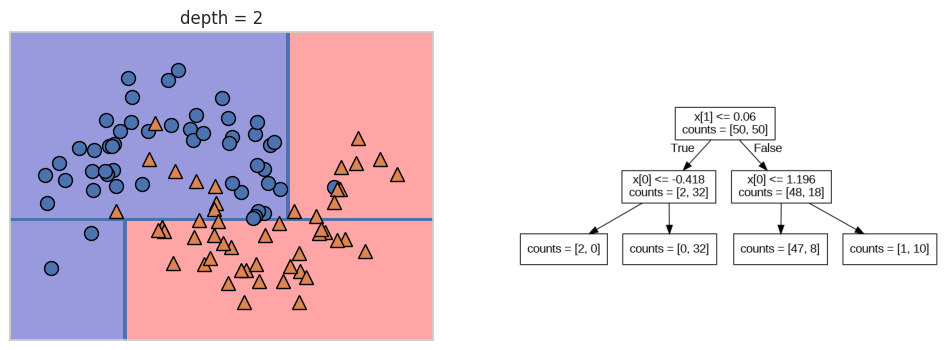

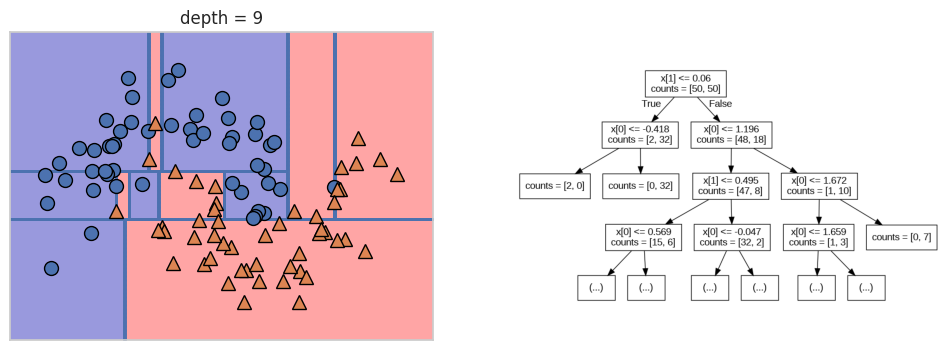

In [40]:
# @title
%%capture
!pip install mglearn
import mglearn
mglearn.plots.plot_tree_progressive()

### **결정 트리가 과적합(overfitting)되는 사례**를 시각적으로 보여주기 위해 과적합이 발생할 수 있는 예제를 만들어 보겠습니다. 이를 위해 결정 트리의 깊이를 제한하지 않고 학습시키고, 학습 데이터와 테스트 데이터에 대한 성능을 비교할 것입니다.

Train Accuracy: 0.7428571428571429
Test Accuracy: 0.5666666666666667


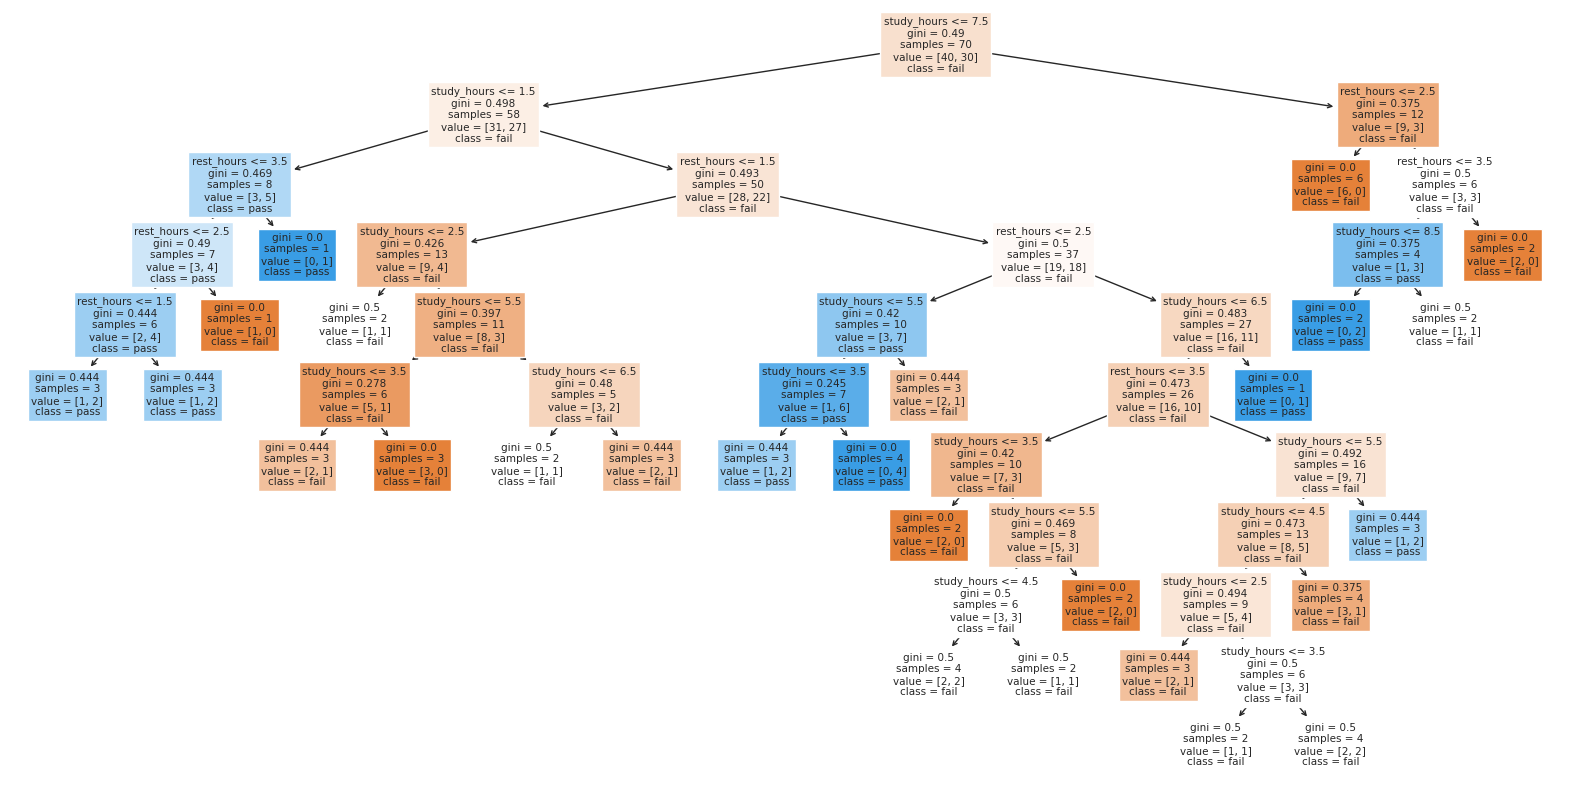

In [22]:
# @title
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 수집
np.random.seed(0)
data = {
    'study_hours': np.random.randint(1, 10, 100),
    'rest_hours': np.random.randint(1, 5, 100),
    'result': np.random.choice(['pass', 'fail'], 100)
}

df = pd.DataFrame(data)

# 데이터 전처리
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

X = df[['study_hours', 'rest_hours']]
y = df['result']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 결정 트리 모델 생성 및 학습 (과적합 사례)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 정확도 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=['study_hours', 'rest_hours'], class_names=label_encoder.classes_, filled=True)
plt.show()


- 결정 트리에서 과적합을 방지하는 방법은 여러 가지가 있습니다. 대표적인 방법으로는 가지치기(pruning), 모델 복잡도 제한, 그리고 교차 검증(cross-validation)을 통한 하이퍼파라미터 튜닝 등이 있습니다. 아래에 각 방법에 대해 설명하고, 코드를 통해 예시를 보여드리겠습니다.

-  **방법 1: 가지치기 (Pruning)**

가지치기는 트리의 복잡도를 줄이는 방법으로, 트리가 너무 깊거나 복잡해지는 것을 방지합니다. Scikit-learn에서는 최대 깊이(max_depth), 최소 샘플 수(min_samples_split), 최소 잎 노드 수(min_samples_leaf) 등을 설정하여 가지치기를 할 수 있습니다.

- **방법 2: 모델 복잡도 제한**

결정 트리의 최대 깊이, 최소 샘플 수 등을 설정하여 트리의 복잡도를 제한할 수 있습니다.

-  **방법 3: 교차 검증을 통한 하이퍼파라미터 튜닝**

교차 검증을 통해 모델의 하이퍼파라미터를 최적화하여 과적합을 방지할 수 있습니다.

아래 코드는 위의 방법들을 사용하여 결정 트리에서 과적합을 방지하는 예제입니다.

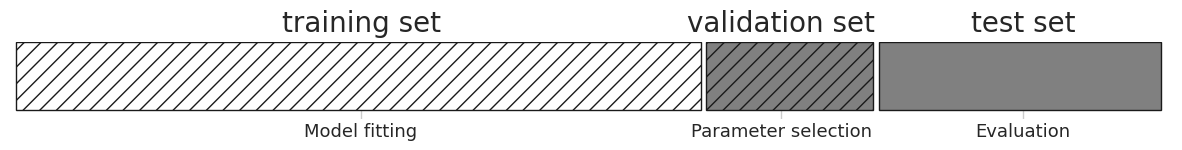

In [48]:
# @title
mglearn.plots.plot_threefold_split()

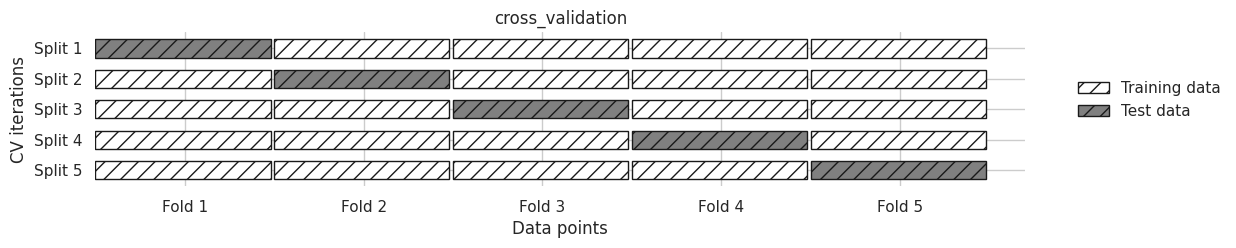

In [47]:
# @title
mglearn.plots.plot_cross_validation()

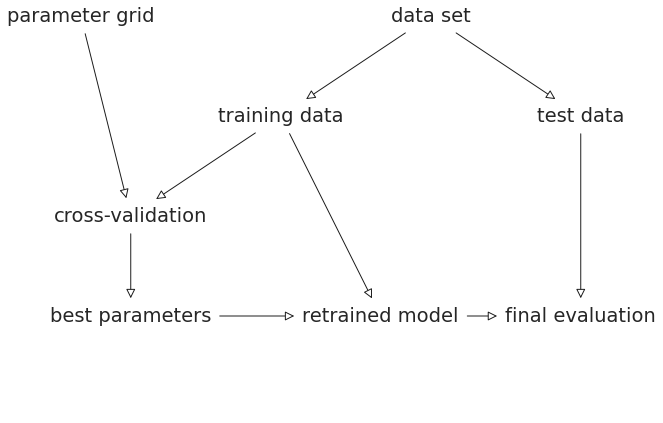

In [57]:
# @title
mglearn.plots.plot_grid_search_overview()

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Accuracy: 0.7
Test Accuracy: 0.5666666666666667


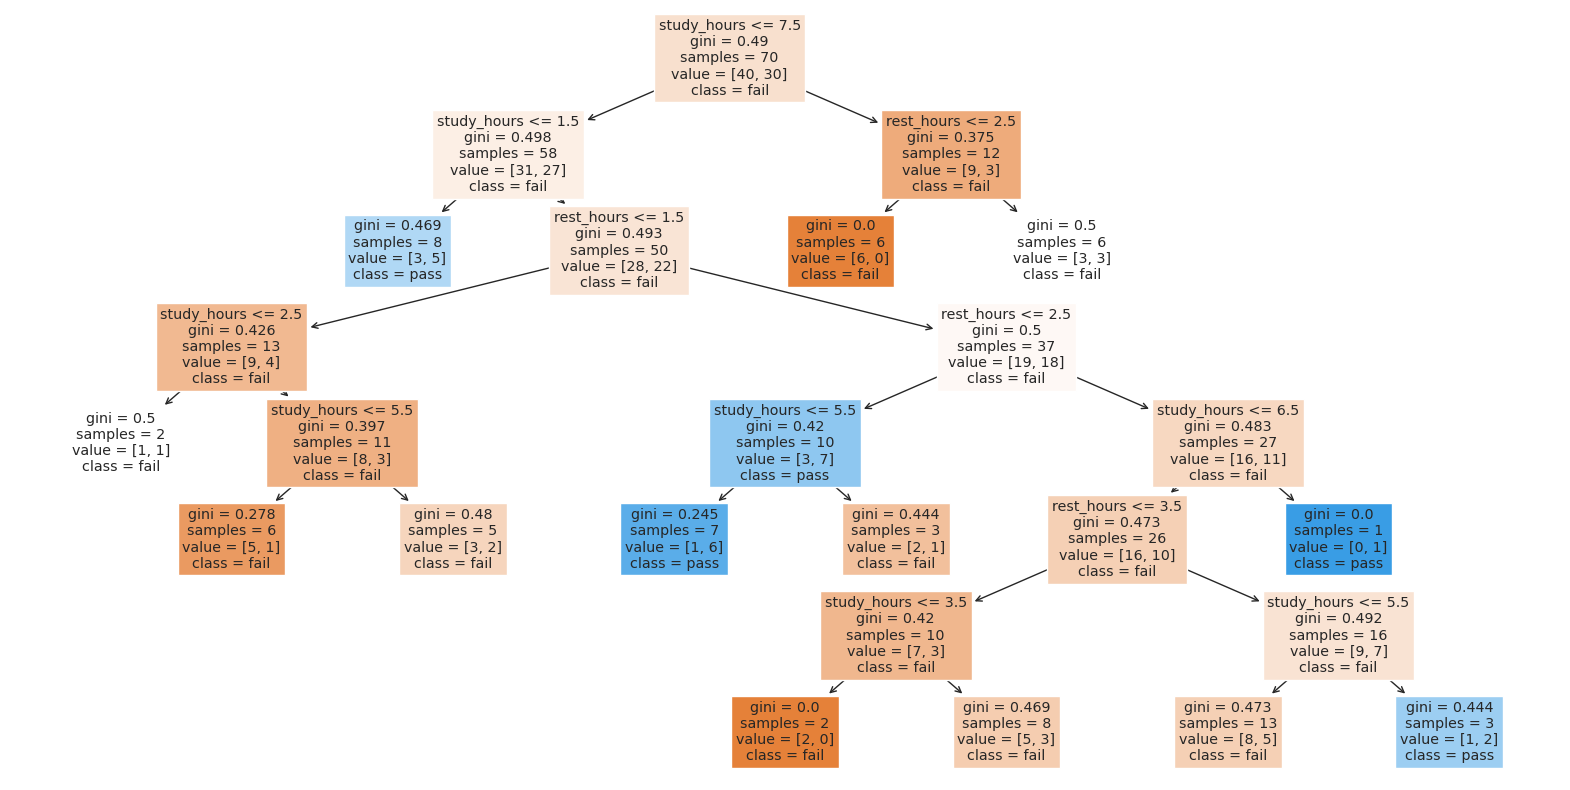

In [23]:
# @title
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 데이터 수집
np.random.seed(0)
data = {
    'study_hours': np.random.randint(1, 10, 100),
    'rest_hours': np.random.randint(1, 5, 100),
    'result': np.random.choice(['pass', 'fail'], 100)
}

df = pd.DataFrame(data)

# 데이터 전처리
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

X = df[['study_hours', 'rest_hours']]
y = df['result']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 복잡도 제한을 위한 하이퍼파라미터 설정
params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치 교차 검증을 통한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적 모델
best_model = grid_search.best_estimator_

# 예측
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 정확도 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=['study_hours', 'rest_hours'], class_names=label_encoder.classes_, filled=True)
plt.show()


Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Accuracy: 0.7
Test Accuracy: 0.5666666666666667


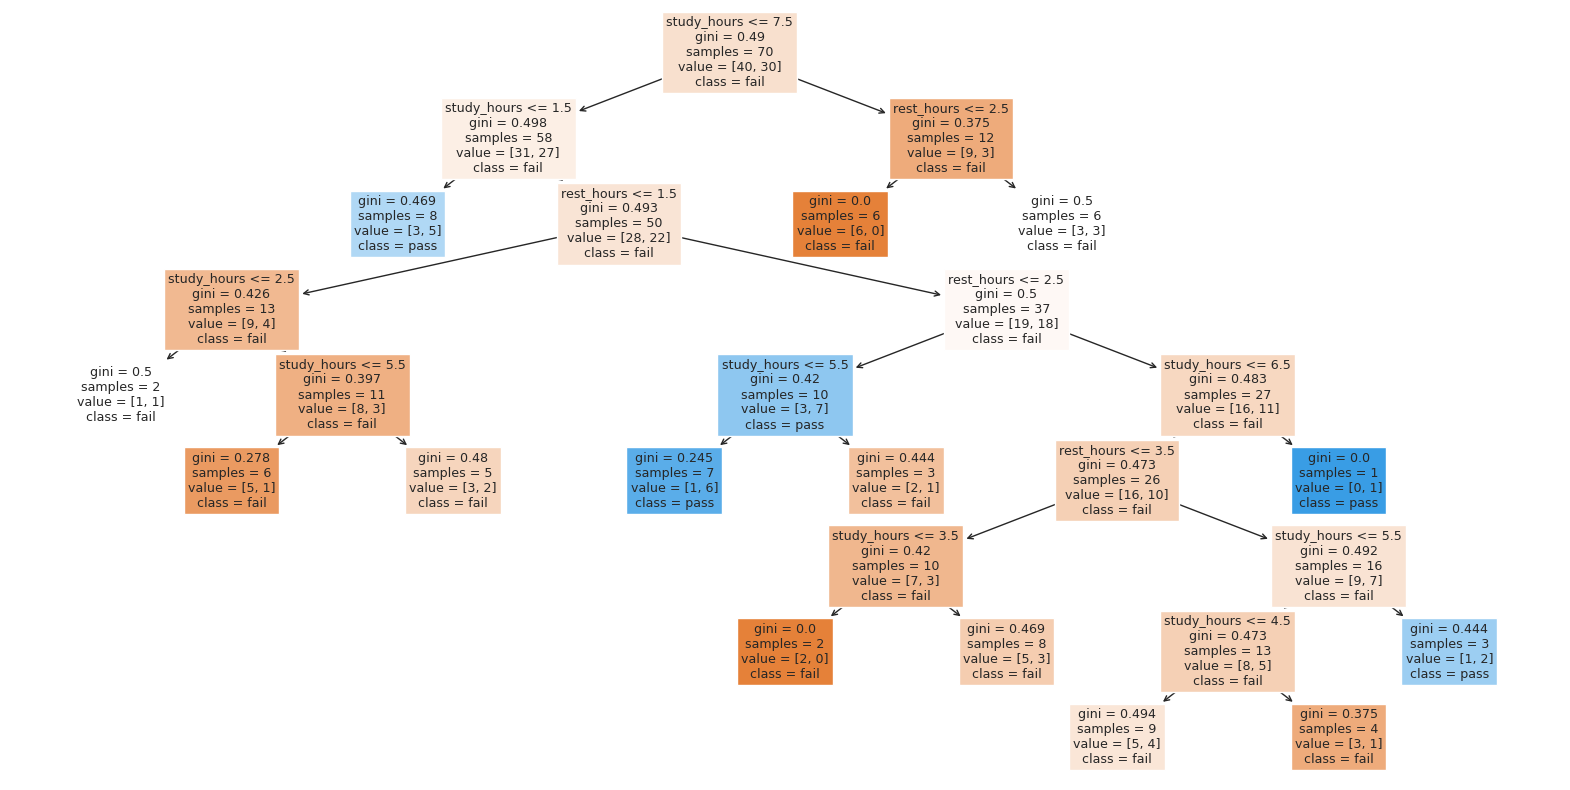

In [34]:
# @title
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint

# 데이터 수집
np.random.seed(0)
data = {
    'study_hours': np.random.randint(1, 10, 100),
    'rest_hours': np.random.randint(1, 5, 100),
    'result': np.random.choice(['pass', 'fail'], 100)
}

df = pd.DataFrame(data)

# 데이터 전처리
label_encoder = LabelEncoder()
df['result'] = label_encoder.fit_transform(df['result'])

X = df[['study_hours', 'rest_hours']]
y = df['result']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 복잡도 제한을 위한 하이퍼파라미터 설정
params = {
    'max_depth': randint(2, 15),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=params,
                                   n_iter=100,
                                   cv=5,
                                   scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# 최적 모델
best_model = random_search.best_estimator_

# 예측
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 정확도 계산
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=['study_hours', 'rest_hours'], class_names=label_encoder.classes_, filled=True)
plt.show()


In [35]:
# @title
pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').iloc[:, 4:]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,14,1,10,"{'max_depth': 14, 'min_samples_leaf': 1, 'min_...",0.571429,0.500000,0.571429,0.428571,0.500000,0.514286,0.053452,1
84,10,1,9,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.571429,0.500000,0.571429,0.428571,0.500000,0.514286,0.053452,1
78,12,1,10,"{'max_depth': 12, 'min_samples_leaf': 1, 'min_...",0.571429,0.500000,0.571429,0.428571,0.500000,0.514286,0.053452,1
90,13,1,3,"{'max_depth': 13, 'min_samples_leaf': 1, 'min_...",0.642857,0.428571,0.428571,0.571429,0.428571,0.500000,0.090351,4
85,8,2,9,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.571429,0.428571,0.500000,0.428571,0.500000,0.485714,0.053452,5
...,...,...,...,...,...,...,...,...,...,...,...,...
98,7,8,5,"{'max_depth': 7, 'min_samples_leaf': 8, 'min_s...",0.357143,0.428571,0.571429,0.285714,0.214286,0.371429,0.122890,91
63,7,8,10,"{'max_depth': 7, 'min_samples_leaf': 8, 'min_s...",0.357143,0.428571,0.571429,0.285714,0.214286,0.371429,0.122890,91
1,12,8,14,"{'max_depth': 12, 'min_samples_leaf': 8, 'min_...",0.357143,0.428571,0.571429,0.285714,0.214286,0.371429,0.122890,91
95,7,8,2,"{'max_depth': 7, 'min_samples_leaf': 8, 'min_s...",0.357143,0.428571,0.571429,0.285714,0.214286,0.371429,0.122890,91


In [ ]:
# @title
